# =============================
# BÀI TẬP 3: Luật kết hợp cho hệ khuyến nghị
# =============================

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
import os
import urllib.request
import zipfile

In [2]:
ml_100k_url = 'https://files.grouplens.org/datasets/movielens/ml-100k.zip'
ml_100k_zip = 'ml-100k.zip'
ml_100k_folder = 'ml-100k'

if not os.path.exists(ml_100k_folder):
    if not os.path.exists(ml_100k_zip):
        print('Downloading MovieLens 100K dataset...')
        urllib.request.urlretrieve(ml_100k_url, ml_100k_zip)
    print('Extracting MovieLens 100K dataset...')
    with zipfile.ZipFile(ml_100k_zip, 'r') as zip_ref:
        zip_ref.extractall('.')

# Đọc dữ liệu đánh giá
ratings_cols = ['userID', 'itemID', 'rating', 'timestamp']
ratings_df = pd.read_csv('ml-100k/u.data', sep='\t', names=ratings_cols, encoding='latin-1')

ratings_df.head()

Extracting MovieLens 100K dataset...


,userID,itemID,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


from matplotlib import pyplot as plt
_df_0['userID'].plot(kind='hist', bins=20, title='userID')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['itemID'].plot(kind='hist', bins=20, title='itemID')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['rating'].plot(kind='hist', bins=20, title='rating')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['timestamp'].plot(kind='hist', bins=20, title='timestamp')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='userID', y='itemID', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='itemID', y='rating', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='rating', y='timestamp', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['timestamp']
  ys = series['userID']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('timestamp', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('timestamp')
_ = plt.ylabel('userID')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['timestamp']
  ys = series['itemID']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('timestamp', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('timestamp')
_ = plt.ylabel('itemID')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['timestamp']
  ys = series['rating']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('timestamp', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('timestamp')
_ = plt.ylabel('rating')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['timestamp']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'timestamp'}, axis=1)
              .sort_values('timestamp', ascending=True))
  xs = counted['timestamp']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('timestamp', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('timestamp')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_11['userID'].plot(kind='line', figsize=(8, 4), title='userID')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_12['itemID'].plot(kind='line', figsize=(8, 4), title='itemID')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['rating'].plot(kind='line', figsize=(8, 4), title='rating')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['timestamp'].plot(kind='line', figsize=(8, 4), title='timestamp')
plt.gca().spines[['top', 'right']].set_visible(False)

In [3]:
# TODO: Chuyển đổi dữ liệu đánh giá thành dữ liệu giao dịch
# 1. Lọc các đánh giá cao (rating >= 4)
high_rating_df = ratings_df[ratings_df['rating'] >= 4]
# Lưu dữ liệu đã lọc ra file CSV (không ghi index để tránh cột số thứ tự)
high_rating_df.to_csv('high_ratings.csv', index=False)
# Đọc lại file đã lọc
filtered_df = pd.read_csv('high_ratings.csv')
# Kiểm tra kết quả
filtered_df.head()

,userID,itemID,rating,timestamp
0,298,474,4,884182806
1,253,465,5,891628467
2,286,1014,5,879781125
3,200,222,5,876042340
4,122,387,5,879270459


from matplotlib import pyplot as plt
_df_15['userID'].plot(kind='hist', bins=20, title='userID')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_16['itemID'].plot(kind='hist', bins=20, title='itemID')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_17['rating'].plot(kind='hist', bins=20, title='rating')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_18['timestamp'].plot(kind='hist', bins=20, title='timestamp')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_19.plot(kind='scatter', x='userID', y='itemID', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_20.plot(kind='scatter', x='itemID', y='rating', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_21.plot(kind='scatter', x='rating', y='timestamp', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['rating']
  ys = series['userID']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_22.sort_values('rating', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('rating')
_ = plt.ylabel('userID')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['rating']
  ys = series['itemID']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_23.sort_values('rating', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('rating')
_ = plt.ylabel('itemID')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['rating']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'rating'}, axis=1)
              .sort_values('rating', ascending=True))
  xs = counted['rating']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_24.sort_values('rating', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('rating')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['timestamp']
  ys = series['userID']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_25.sort_values('timestamp', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('timestamp')
_ = plt.ylabel('userID')

from matplotlib import pyplot as plt
_df_26['userID'].plot(kind='line', figsize=(8, 4), title='userID')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_27['itemID'].plot(kind='line', figsize=(8, 4), title='itemID')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_28['rating'].plot(kind='line', figsize=(8, 4), title='rating')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_29['timestamp'].plot(kind='line', figsize=(8, 4), title='timestamp')
plt.gca().spines[['top', 'right']].set_visible(False)

In [4]:
# TODO: Áp dụng thuật toán Apriori
# 1. Chuyển đổi dữ liệu giao dịch thành định dạng ma trận nhị phân
#Tạo danh sách giao dịch: mỗi người dùng -> danh sách phim (ID)
transactions = high_rating_df.groupby('userID')['itemID'].apply(list)

#  Mã hóa danh sách giao dịch thành ma trận nhị phân
te = TransactionEncoder()
te_array = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_array, columns=te.columns_)


In [5]:
# 2. Tìm tập mục thường xuyên
frequent_itemsets = apriori(df_encoded, min_support=0.1, use_colnames=True)

In [6]:
# 3. Tạo luật kết hợp
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.4)

# Xem kết quả
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(1),(7),0.340764,0.279193,0.149682,0.439252,1.573292,1.0,0.054542,1.285439,0.552746,0.318284,0.222056,0.487687
1,(7),(1),0.279193,0.340764,0.149682,0.536122,1.573292,1.0,0.054542,1.421139,0.505531,0.318284,0.296339,0.487687
2,(9),(1),0.223992,0.340764,0.102972,0.459716,1.349072,1.0,0.026644,1.220164,0.333437,0.222989,0.180438,0.380948
3,(12),(1),0.246285,0.340764,0.114650,0.465517,1.366097,1.0,0.030725,1.233409,0.355556,0.242697,0.189239,0.400983
4,(15),(1),0.199575,0.340764,0.107219,0.537234,1.576556,1.0,0.039211,1.424555,0.456890,0.247549,0.298027,0.425938


from matplotlib import pyplot as plt
_df_30['antecedent support'].plot(kind='hist', bins=20, title='antecedent support')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_31['consequent support'].plot(kind='hist', bins=20, title='consequent support')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_32['support'].plot(kind='hist', bins=20, title='support')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_33['confidence'].plot(kind='hist', bins=20, title='confidence')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_34.groupby('antecedents').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_35.groupby('consequents').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_36.plot(kind='scatter', x='antecedent support', y='consequent support', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_37.plot(kind='scatter', x='consequent support', y='support', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_38.plot(kind='scatter', x='support', y='confidence', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_39.plot(kind='scatter', x='confidence', y='lift', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['consequent support']
  ys = series['antecedent support']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_40.sort_values('consequent support', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('antecedents')):
  _plot_series(series, series_name, i)
  fig.legend(title='antecedents', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('consequent support')
_ = plt.ylabel('antecedent support')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['consequent support']
  ys = series['antecedent support']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_41.sort_values('consequent support', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('consequents')):
  _plot_series(series, series_name, i)
  fig.legend(title='consequents', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('consequent support')
_ = plt.ylabel('antecedent support')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['consequent support']
  ys = series['support']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_42.sort_values('consequent support', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('antecedents')):
  _plot_series(series, series_name, i)
  fig.legend(title='antecedents', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('consequent support')
_ = plt.ylabel('support')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['consequent support']
  ys = series['support']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_43.sort_values('consequent support', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('consequents')):
  _plot_series(series, series_name, i)
  fig.legend(title='consequents', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('consequent support')
_ = plt.ylabel('support')

from matplotlib import pyplot as plt
_df_44['antecedent support'].plot(kind='line', figsize=(8, 4), title='antecedent support')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_45['consequent support'].plot(kind='line', figsize=(8, 4), title='consequent support')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_46['support'].plot(kind='line', figsize=(8, 4), title='support')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_47['confidence'].plot(kind='line', figsize=(8, 4), title='confidence')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['consequents'].value_counts()
    for x_label, grp in _df_48.groupby('antecedents')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('antecedents')
_ = plt.ylabel('consequents')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_49['antecedents'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_49, x='antecedent support', y='antecedents', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_50['consequents'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_50, x='antecedent support', y='consequents', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_51['antecedents'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_51, x='consequent support', y='antecedents', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_52['consequents'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_52, x='consequent support', y='consequents', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [7]:
# TODO: Đánh giá chất lượng luật
# 1. Phân tích độ hỗ trợ, độ tin cậy và độ nâng
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

# Lọc top 10 luật theo lift
top_rules = rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]\
                .sort_values(by='lift', ascending=False).head(10)

# Hiển thị bảng đẹp bằng plotly (đã ép kiểu int → str)
fig = go.Figure(data=[go.Table(
    header=dict(values=["Antecedents", "Consequents", "Support", "Confidence", "Lift"],
                fill_color='lightblue',
                align='left'),
    cells=dict(values=[
        [', '.join([str(i) for i in a]) for a in top_rules['antecedents']],
        [', '.join([str(i) for i in c]) for c in top_rules['consequents']],
        top_rules['support'].round(3),
        top_rules['confidence'].round(3),
        top_rules['lift'].round(3)
    ],
    fill_color='lavender',
    align='left'))
])
fig.update_layout(title="Top 10 Association Rules by Lift", width=1000, height=400)
fig.show()


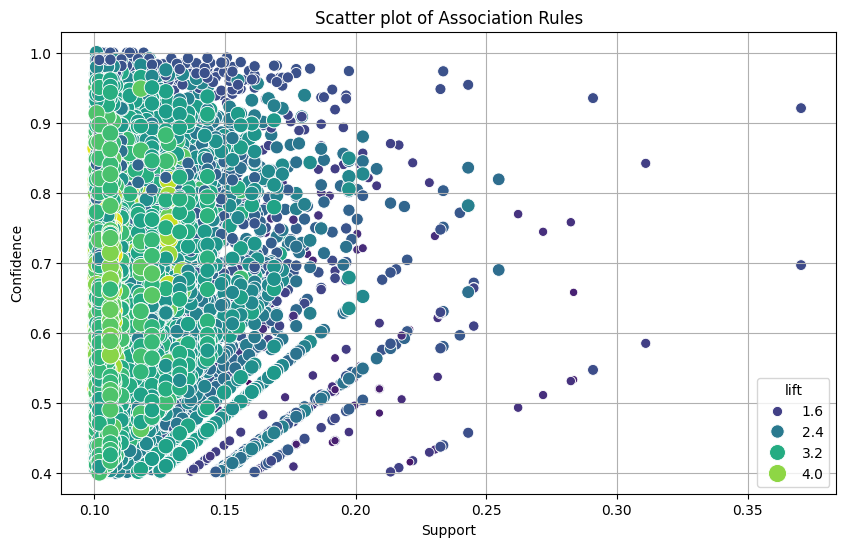

In [8]:
# 2. Trực quan hóa các luật tốt nhất
plt.figure(figsize=(10,6))
sns.scatterplot(data=rules, x='support', y='confidence', size='lift', hue='lift', sizes=(20, 200), palette='viridis')
plt.title('Scatter plot of Association Rules')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.grid(True)
plt.show()

In [9]:
# TODO: Xây dựng hệ khuyến nghị dựa trên luật
# def recommend_movies(user_movies, rules, top_n=10):
#     recommendations = []
#     for _, rule in rules.iterrows():
#         antecedents = set(rule['antecedents'])
#         if antecedents.issubset(user_movies):
#             for movie in rule['consequents']:
#                 if movie not in user_movies:
#                     recommendations.append((movie, rule['confidence'], rule['lift']))
#
#     # Sắp xếp theo độ tin cậy và độ nâng
#     recommendations.sort(key=lambda x: (x[1], x[2]), reverse=True)
#     return recommendations[:top_n]
# Hàm khuyến nghị phim dựa trên luật kết hợp
def recommend_movies(user_movies, rules, top_n=10):
    recommendations = []
    for _, rule in rules.iterrows():
        antecedents = set(rule['antecedents'])
        if antecedents.issubset(user_movies):
            for movie in rule['consequents']:
                if movie not in user_movies:
                    try:
                        movie_int = int(movie)
                        recommendations.append((movie_int, rule['confidence'], rule['lift']))
                    except:
                        continue  # bỏ qua nếu không chuyển được sang int

    # Sắp xếp theo độ tin cậy và độ nâng
    recommendations.sort(key=lambda x: (x[1], x[2]), reverse=True)
    return recommendations[:top_n]


# ================================
# Gọi thử hàm khuyến nghị
# ================================

user_movies = {1, 50}  # Giả sử người dùng đã xem phim có ID 1 và 50

# Gọi hàm khuyến nghị
recommendations = recommend_movies(user_movies, rules, top_n=10)

# Đọc dữ liệu tên phim
movies_df = pd.read_csv(
    'ml-100k/u.item',
    sep='|',
    encoding='latin-1',
    header=None,
    usecols=[0, 1],
    names=['itemID', 'title']
)
movie_dict = dict(zip(movies_df['itemID'], movies_df['title']))

# In kết quả
if recommendations:
    print("🎬 Gợi ý phim cho người dùng:")
    for movie, confidence, lift in recommendations:
        movie_name = movie_dict.get(movie, f'Phim ID {movie}')
        print(f"- {movie_name} | Độ tin cậy: {confidence:.2f} | Độ nâng: {lift:.2f}")
else:
    print("⚠️ Không có gợi ý phù hợp với lịch sử người dùng.")

🎬 Gợi ý phim cho người dùng:
- Return of the Jedi (1983) | Độ tin cậy: 0.75 | Độ nâng: 1.86
- Return of the Jedi (1983) | Độ tin cậy: 0.70 | Độ nâng: 1.73
- Raiders of the Lost Ark (1981) | Độ tin cậy: 0.63 | Độ nâng: 1.70
- Return of the Jedi (1983) | Độ tin cậy: 0.61 | Độ nâng: 1.53
- Empire Strikes Back, The (1980) | Độ tin cậy: 0.60 | Độ nâng: 1.91
- Raiders of the Lost Ark (1981) | Độ tin cậy: 0.58 | Độ nâng: 1.58
- Fargo (1996) | Độ tin cậy: 0.58 | Độ nâng: 1.34
- Return of the Jedi (1983) | Độ tin cậy: 0.58 | Độ nâng: 1.56
- Fargo (1996) | Độ tin cậy: 0.56 | Độ nâng: 1.31
- Silence of the Lambs, The (1991) | Độ tin cậy: 0.56 | Độ nâng: 1.53
